# Assignment List (100 marks)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Python Programming. (20 marks)
2. Linear Regression. (28 marks)
3. Classification. (52 marks)

<span style="color:red">**Deadline: 12:00 Noon, 15/01/2024**<span>

**Submit a rar/zip folder to Brightspace under the unit of Machine Learning for Media Production**

## Part 1. Python Programming (20 marks)

<span style="color:red">**Note: The code you design needs to be generalizable to all test samples.**<span>

### Question 1. Change Password (6 marks)
#### Given a string `password` and a positive integer `n`, could you design a script to move the first `n` characters of `password` to the end of the string in the same order as before? e.g.,
`Input: password="Bournemouth_University", n=6`

`Output: "mouth_UniversityBourne"`

In [ ]:
password="Bournemouth_University" #This can be modified to any string you like
n=6                               #This can be modified to any integer you like

first_part = password[:n]
last_part = password[n:]
new_password = last_part + first_part

print("input:", password)

print("output:", new_password)

input: Bournemouth_University
output: mouth_UniversityBourne


In [3]:
def move_n_chars(password, n):

  if n <= 0 or n >= len(password):
    return password
  else:
    return password[n:] + password[:n]

# Example usage
password = "Bournemouth_University"
n = 6
new_password = move_n_chars(password, n)
print(password)
print(new_password)


Bournemouth_University
mouth_UniversityBourne


### Question 2. Daffodil Numbers (8 marks)
#### A daffodil number is a positive integer whose sum of the cubes in each bit equals itself. Could you design a script to output all the daffodils numbers in the range of [0, 1000). e.g.,

$$ 1^3 + 5^3 +3^3 = 153$$

TRYING TO SOLVE SIMPLE PROGRAMMING PROBLEMS USING USING TWO DIFFERENT WAYS


In [ ]:
daffodil_list=[] # Initialize the list used to store daffodil numbers.
def is_daffodil(n):

  digits = [int(d) for d in str(n)]
  return sum(d**3 for d in digits) == n

daffodils_list = [n for n in range(1000) if is_daffodil(n)]

print(daffodils_list)


[0, 1, 153, 370, 371, 407]


In [4]:
import math

def is_daffodil(num):
  sum_cubes = 0
  temp = num
  while temp > 0:
    digit = temp % 10
    sum_cubes += digit ** 3
    temp //= 10

  return num == sum_cubes

def get_daffodils(start, end):
  results = []
  for i in range(start, end):
    if is_daffodil(i):
      results.append(i)
  return results

daffodils = get_daffodils(0, 1000)
print(daffodils)

[0, 1, 153, 370, 371, 407]


### Question 3. Maximum Perimeter of Triangles (6 marks)
#### Given an list of positive numbers (representing lengths), could you design a script to return the maximum perimeter of a triangle consisting of three of those lengths. If no triangles can be formed, return 0.

<span style="color:red">**The condition that a triangle can be formed: the sum of any two edges of the triangle is greater than the third edge.</span>*

e.g.,

`Input: nums=[3,1,2,2,1]`
`Output: 7`

`Input: nums=[1,2,1,10]`
`Output: 0`

In [ ]:
nums=[2,4,2,1] #This can be modified to any length you like

def max_perimeter_triangle(nums):
  max_perimeter= 0
  for i in range(len(nums)):
    for j in range(i+1, len(nums)):
      for k in range(j+1,len(nums)):
        a= nums[i]
        b= nums[j]
        c =nums[k]
        if a +b> c and b+c>a and a+c>b:
          perimeter= a+b+c
          if perimeter > max_perimeter:
            max_perimeter=perimeter
    return max_perimeter
result = max_perimeter_triangle(nums)
print("input:", nums)
print("output:", result)


input: [2, 4, 2, 1]
output: 5


In [ ]:
nums=[2,4,2,1] #This can be modified to any length you like

def max_perimeter(nums):
  nums.sort(reverse=True)

  for i in range(len(nums)-2):
    if nums[i] < nums[i+1] + nums[i+2]:
      return nums[i] + nums[i+1] + nums[i+2]

  return 0

nums = [3,1,2,2,1]
print(max_perimeter(nums)) # 7

nums = [1,2,1,10]
print(max_perimeter(nums)) # 0

nums=[2,4,2,1]
print(max_perimeter(nums))

7
0
5


## Part 2. Linear Regression (28 marks)

### Task 1. Split Dataset (6 marks)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

data_df = pd.read_csv("Salary_dataset.csv")
X = data_df["YearsExperience"].to_numpy()
y = data_df["Salary"].to_numpy()

theta = np.array([1000.0,1000.0])


X_0 = np.ones(X.shape[0])
X = np.column_stack((X_0, X))

X = X.reshape((30, 2))

train_indices = np.random.rand(len(X)) < 0.66
train_X = X[train_indices]
train_y = y[train_indices]

test_X = X[~train_indices]
test_y = y[~train_indices]

Saving Salary_dataset.csv to Salary_dataset.csv


### Task 2. Initialization and Plotting (6 marks)

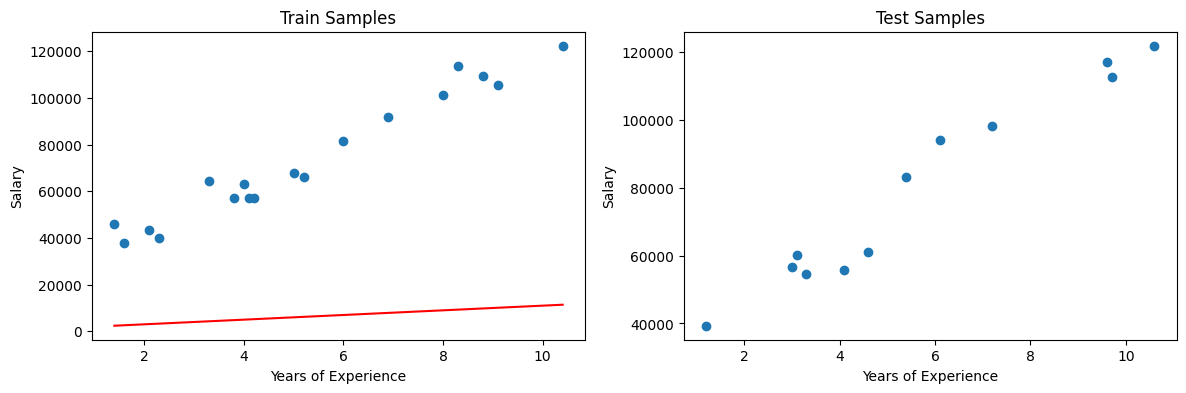

In [9]:
y_pred = np.dot(train_X, theta)

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X[:, 1], train_y)
plt.plot(train_X[:, 1], y_pred, c="red")


plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X[:,1],test_y)

### Task 3. Gradient Descent (6 marks)

In [10]:
alpha = 0.0001
train_loss_list = []
test_loss_list = []

for iteration in range(1000):

    y_pred = np.dot(train_X, theta)
    train_loss = np.mean((y_pred - train_y)**2) / 2
    train_loss_list.append(train_loss)

    y_test_pred = np.dot(test_X, theta)
    test_loss = np.mean((y_test_pred - test_y)**2) / 2
    test_loss_list.append(test_loss)

    gradient = np.dot(train_X.T, (y_pred - train_y)) / len(train_X)
    theta -= alpha * gradient


### Task 4. Result Plotting (6 marks)

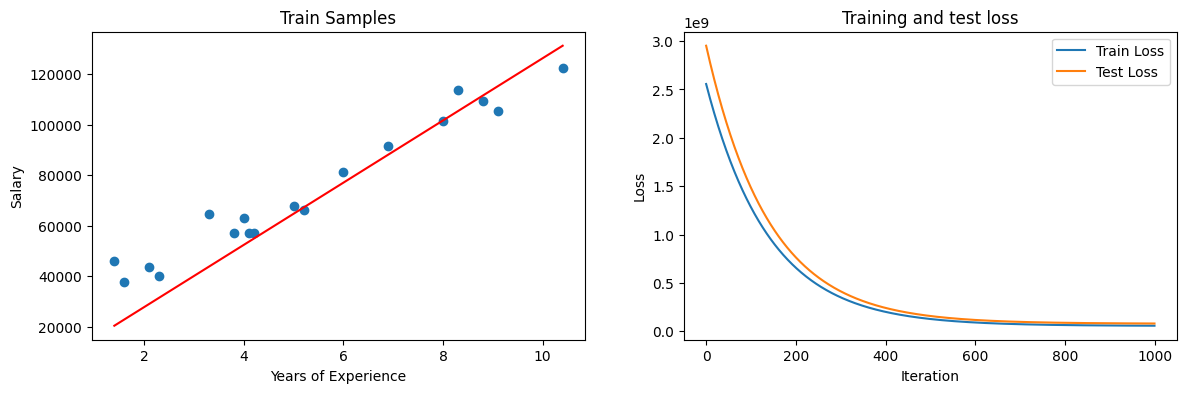

In [11]:
plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X[:, 1], train_y)
plt.plot(train_X[:, 1], np.dot(train_X, theta), c="red")

plt.subplot(1,2,2)
plt.title("Training and test loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(range(len(train_loss_list)), train_loss_list, label="Train Loss")
plt.plot(range(len(test_loss_list)), test_loss_list, label="Test Loss")
plt.legend()

### Task 5. Result Analysis (4 marks)
#### What can you find from the plotted results above? Any improvements you think could be made to the above code?

The plotted results show improved fitting of the optimized line to the training samples. Training and test loss curves converge, indicating effective learning. This can be inproved further by fine tuning the learning rates and iterations. also adding visualization for enhanced analysis


## Part 3. Classification (52 marks)

### Task 1. Dataset Split and Plotting (6 marks)

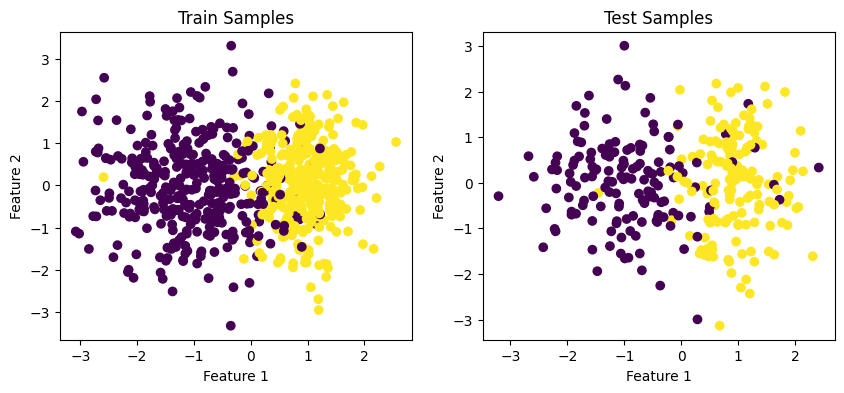

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1,random_state=2)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

# Plot train and test samples
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(train_X[:,1], train_X[:,2], c=train_y)

plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(test_X[:,1], test_X[:,2], c=test_y)

### Task 2. Logistic Regression (14 marks)

In [14]:
theta = np.array([[1.0],
                  [2.0],
                  [1.0]])

train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

alpha = 0.0001
train_loss_list_1 = []
test_loss_list_1 = []
train_acc_list_1 = []
test_acc_list_1 = []

for epoch in range(2000):
  z = np.dot(train_X, theta)
  a = 1 / (1 + np.exp(-z))



  train_loss = -np.mean(train_y*np.log(a) + (1-train_y)*np.log(1-a))
  train_loss_list_1.append(train_loss)


  train_pred_list=[]
  for i in a:
    if i >0.5:
      train_pred_list.append(1)
    else:
      train_pred_list.append(0)
  count=0
  for i in (np.array(train_pred_list)-train_y.reshape(-1)):
    if i==0:
      count+=1

  train_acc_list_1.append(count/len(train_pred_list))


  test_z = np.dot(test_X, theta)
  test_a = 1 / (1 + np.exp(-test_z))
  test_loss = -np.mean(test_y*np.log(test_a) + (1-test_y)*np.log(1-test_a))
  test_loss_list_1.append(test_loss)

  test_pred_list = []
  for i in test_a:
    if np.array(i) > 0.5:
      test_pred_list.append(1)
    else:
      test_pred_list.append(0)
  count = 0
  for i in (np.array(test_pred_list) - test_y.reshape(-1)):
    if i==0:
      count += 1
  test_acc_list_1.append(count/len(test_pred_list))


  theta = theta - alpha*np.dot(train_X.T,a-train_y)

### Task 3. Neural Network (20 marks)
<span style="color:blue">**Here we use a neural network (MLP) with three nodes in the input layer, two nodes in the hidden layer and one node in the output layer, and Sigmoid function for the activation function.</span>*

In [ ]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

alpha = 0.0001
train_loss_list_2 = []
test_loss_list_2 = []
train_acc_list_2 = []
test_acc_list_2 = []


for epoch in range(2000):
  z_1 = np.dot(train_X,theta_1)
  h_1 = 1 / (1 + np.exp(-z_1))
  z_2 = np.dot(h_1, theta_2)
  h_2 = 1 / (1 + np.exp(-z_2))


  train_loss = -np.mean(train_y*np.log(h_2) + (1-train_y)*np.log(1-h_2))
  train_loss_list_2.append(train_loss)

  train_pred_list=[]
  for i in h_2:
    if i >0.5:
      train_pred_list.append(1)
    else:
      train_pred_list.append(0)
  count=0
  for i in (np.array(train_pred_list)-train_y.reshape(-1)):
    if i==0:
      count+=1
  train_acc_list_2.append(count/len(train_pred_list))


  test_z_1 = np.dot(test_X, theta_1)
  test_h_1 = 1 / (1 + np.exp(-test_z_1))
  test_z_2 = np.dot(test_h_1, theta_2)
  test_h_2 = 1 / (1 + np.exp(-test_z_2))
  test_loss = -np.mean(test_y*np.log(test_h_2) + (1-test_y)*np.log(1-test_h_2))
  test_loss_list_2.append(test_loss)


  test_pred_list=[]
  for i in test_h_2:
    if i > 0.5:
      test_pred_list.append(1)
    else:
      test_pred_list.append(0)
  count = 0
  for i in (np.array(test_pred_list) - test_y.reshape(-1)):
    if i==0:
      count += 1
  test_acc_list_2.append(count/len(test_pred_list))


  theta_2 = theta_2 - alpha * np.dot(h_1.T, (h_2-train_y))
  theta_1 = theta_1 - alpha * np.dot(train_X.T, np.dot((h_2-train_y), theta_2.T) * h_1 * (1-h_1))


### Task 4. Result Plotting (8 marks)

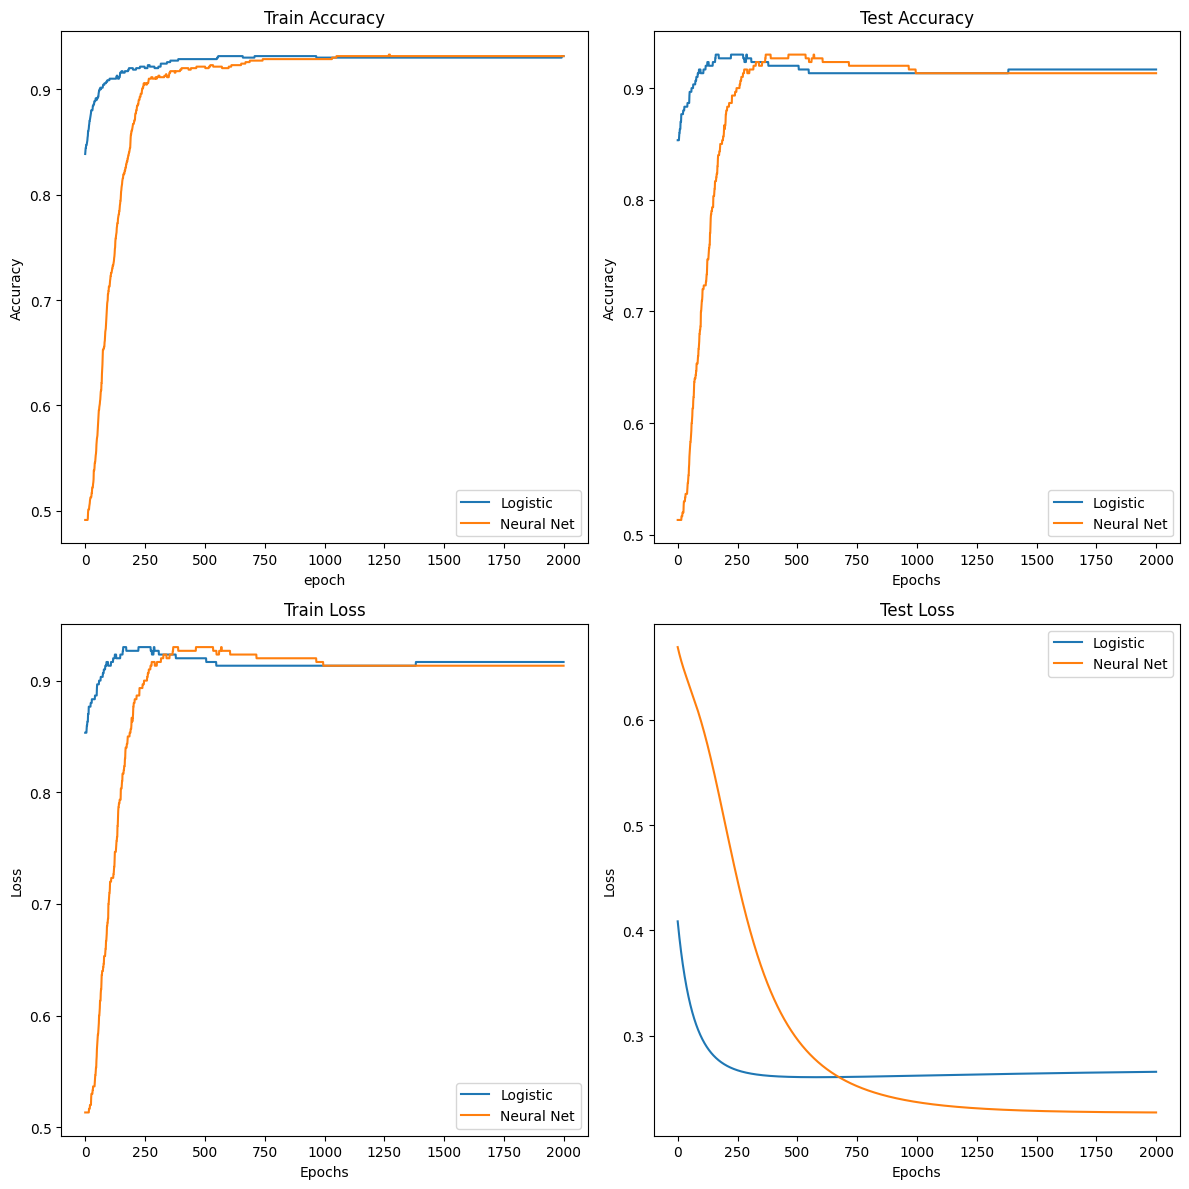

In [ ]:
plt.figure(figsize=[12,12])


plt.subplot(2,2,1)
plt.plot(train_acc_list_1, label='Logistic')
plt.plot(train_acc_list_2, label='Neural Net')
plt.title("Train Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2,2)
plt.plot(test_acc_list_1, label='Logistic')
plt.plot(test_acc_list_2, label='Neural Net')
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2,3)
plt.plot(test_acc_list_1, label='Logistic')
plt.plot(test_acc_list_2, label='Neural Net')
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2,2,4)
plt.plot(test_loss_list_1, label='Logistic')
plt.plot(test_loss_list_2, label='Neural Net')
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### Task 5. Principle Analysis (4 marks)
#### Could you explain the principles of Gradient Descent and Backward Propagation based on your understanding?

Gradient descent is used to optimize an algorithm. its main purpose is to minimize the cost function. The goal of gradient descent is to find the optimal set of weights that result in lowest loss. while backpropagation is an extension of the gradient descent  that  allows us to train neural networks in multiple layers. it works by propagating the errors backwards through the network, layer by layer, to compute the gradients of the loss with respect to each weight